# Diploma in Artificial Intelligence

# AI Programming (April 2021), Session 5

# Topic: Non-linear regression and prediction

In this notebook, we will cover a simple example of non-linear regression.

We will first create an artificial example of data, where the relationship between the input x and the output y is non-linear.

Then we will model the relationship with support vector machines (SVM). We will use a library implementation of SVM.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from sklearn.svm import SVR # Library implementation of support vector machines

In [3]:
# Create an artificial data set, with a non-linear relationship between x and y.
x = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(x) + 0.2*np.random.rand(100,1) # some noise (uncertainty in measurements)
y = y.ravel()

In [4]:
x.shape

(100, 1)

In [5]:
y.shape

(100,)

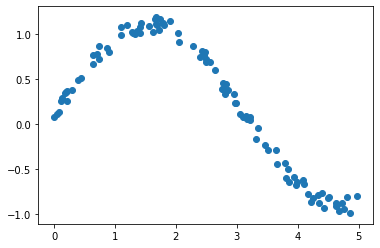

In [6]:
plt.scatter(x,y)

In [7]:
# Create a SVM model with the library implementation:
svr_rbf_malli = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_linear_malli = SVR(kernel='linear', C=100, gamma='auto')
svr_polynomial_malli = SVR(kernel='poly', degree=3)
svr_sigmoid_malli = SVR(kernel='sigmoid', gamma='auto', coef0=2)

In [8]:
# Fit the model with the data:
svr_rbf_malli.fit(x,y)
svr_linear_malli.fit(x,y)
svr_polynomial_malli.fit(x,y)
svr_sigmoid_malli.fit(x,y)

SVR(C=1.0, cache_size=200, coef0=2, degree=3, epsilon=0.1, gamma='auto',
    kernel='sigmoid', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [9]:
# Compute predictions for each model:

y_pred_linear = svr_linear_malli.predict(x)
y_pred_polynomial = svr_polynomial_malli.predict(x)
y_pred_sigmoid = svr_sigmoid_malli.predict(x)


svr_rbf_malli = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_rbf_malli.fit(x,y)
y_pred_rbf = svr_rbf_malli.predict(x)

print(y_pred_rbf)
print(y)

# Sum of squares error (SSE):
print(np.sum((y_pred_rbf - y)**2))

# Mean squared error (MSE):
print(np.mean((y_pred_rbf - y)**2))

[ 0.14760721  0.19636797  0.22943881  0.25833708  0.27267226  0.31037827
  0.32986942  0.34334133  0.35398206  0.42413684  0.51548897  0.55260818
  0.71845672  0.72248445  0.76715853  0.7865785   0.79253402  0.88115489
  0.90415637  1.00124689  1.00445098  1.04159132  1.06361994  1.0675495
  1.07751185  1.08296507  1.09191719  1.09358293  1.09388386  1.10288852
  1.10097632  1.09771545  1.09681342  1.09556669  1.09504606  1.08906827
  1.08532953  1.07619549  1.07276749  1.04341637  0.98869887  0.98638756
  0.85121382  0.76627768  0.75107067  0.71474833  0.70224786  0.69236682
  0.69163057  0.64639654  0.56424197  0.46778429  0.4567271   0.45215105
  0.41245812  0.40104147  0.37795651  0.27676107  0.26078947  0.24303907
  0.17886696  0.13727254  0.11927256  0.09000393  0.062129    0.0210736
  0.0187514  -0.08141534 -0.11446748 -0.21597187 -0.26829517 -0.37478693
 -0.3951737  -0.50188754 -0.50759236 -0.53698159 -0.5535206  -0.60524819
 -0.62786254 -0.63405124 -0.69966185 -0.70337502 -0.7

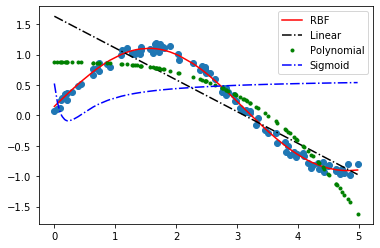

In [10]:
# Data set as points, the prediction function as a line
plt.scatter(x,y)
line1, = plt.plot(x, y_pred_rbf, 'r', label='RBF') # Radial basis function kernel = red
line2, = plt.plot(x, y_pred_linear, 'k-.', label='Linear') # Linear kernel black, dash dotted line
line3, = plt.plot(x, y_pred_polynomial, 'g.', label='Polynomial') # Polynomial kernel, green dotted line
line4, = plt.plot(x, y_pred_sigmoid, 'b-.', label='Sigmoid') # Sigmoid kernel, blue, dash dotted line
plt.legend(handles=[line1, line2, line3, line4])


Exercise 1. Implement non-linear regression for some other data set
